In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
from sklearn import datasets

In [9]:
data = datasets.load_digits()

In [10]:
type(data)

sklearn.utils.Bunch

In [11]:
data

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [12]:
image = data.images

In [13]:
image.size

115008

In [14]:
image[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [15]:
image[990]

array([[  0.,   0.,   6.,  14.,  13.,   3.,   0.,   0.],
       [  0.,   0.,  12.,   2.,   3.,  14.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   8.,  13.,   0.,   0.],
       [  0.,   0.,   0.,  12.,  16.,   3.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   8.,  13.,   1.,   0.],
       [  0.,   1.,   7.,   0.,   0.,   7.,  11.,   0.],
       [  0.,   3.,  13.,   2.,   0.,   7.,  13.,   0.],
       [  0.,   0.,   5.,  14.,  14.,  15.,   6.,   0.]])

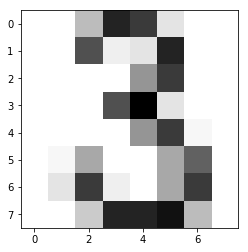

In [18]:
plt.imshow(image[990],cmap='Greys')

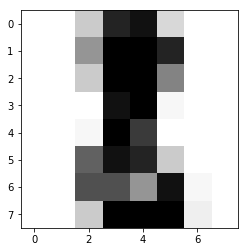

In [19]:
plt.imshow(image[123],cmap='Greys')

In [20]:
_data = data.data

In [21]:
_target = data.target

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(_data,_target,test_size=0.4)

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
digit_recognizer = GaussianNB()

In [26]:
type(digit_recognizer)

sklearn.naive_bayes.GaussianNB

In [27]:
digit_recognizer.fit(x_train,y_train)

GaussianNB(priors=None)

In [28]:
pred = digit_recognizer.predict(x_test)

In [31]:
pred.size

719

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_test,pred)

array([[75,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0, 54,  1,  0,  0,  0,  0,  3,  4,  1],
       [ 0,  5, 52,  0,  1,  0,  1,  0,  6,  2],
       [ 0,  1,  1, 56,  0,  3,  0,  2,  4,  0],
       [ 0,  2,  0,  0, 47,  0,  1,  9,  0,  0],
       [ 0,  0,  0,  3,  2, 61,  1,  4,  2,  1],
       [ 0,  1,  0,  0,  0,  1, 74,  0,  0,  0],
       [ 0,  0,  2,  0,  1,  2,  0, 71,  0,  1],
       [ 0, 12,  2,  0,  0,  2,  0,  6, 62,  0],
       [ 0,  2,  2,  2,  2,  2,  0,  7,  9, 50]], dtype=int64)

In [34]:
c_pred = 75+54+52+56+47+61+74+71+62+50

In [35]:
acc = c_pred/y_test.size

In [36]:
acc

0.8372739916550765

In [37]:
bool_val = (pred==y_test)

In [38]:
bool_val

array([ True, False, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,

In [39]:
bool_val = bool_val.astype(int)

In [40]:
bool_val

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [41]:
bool_val.sum()/y_test.size *100

83.727399165507649

In [42]:
digit_recognizer.score(x_test,y_test)*100

83.727399165507649